In [2]:
import autorootcwd  # Do not delete - adds the root of the project to the path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

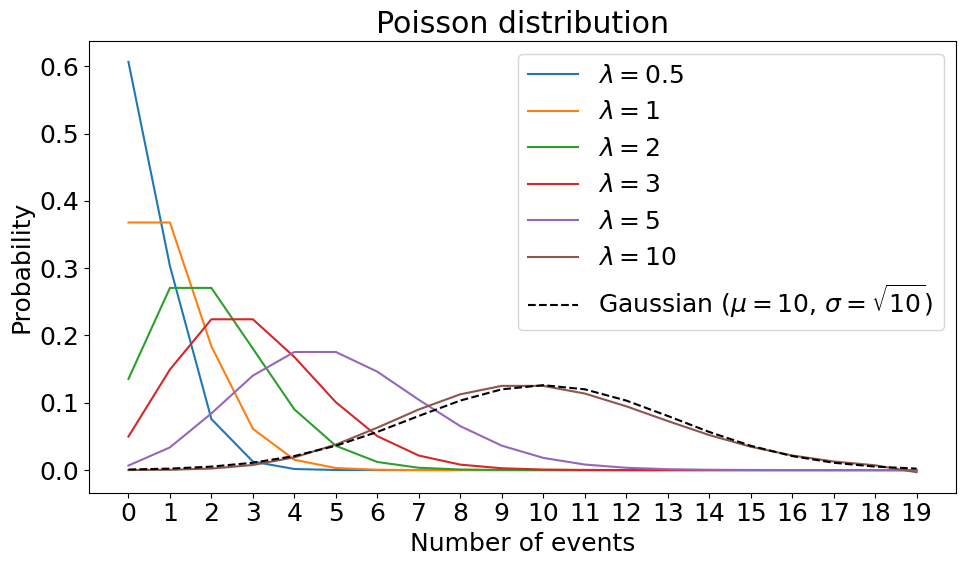

In [30]:
matplotlib.rcParams.update({'font.size': 18})

fig, ax = plt.subplots(figsize=(10, 6))
mu_values = [0.5, 1, 2, 3, 5, 10]
x = np.arange(0, 20)

for mu in mu_values:
    f = [np.math.factorial(i) for i in x]
    y = np.exp(-mu) * mu ** x / f
    ax.plot(x, y, label=f"$\\lambda={mu}$")

# Plot the gaussian
mu = 10
sigma = np.sqrt(mu)
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

ax.plot(x, y, label=f"Gaussian ($\\mu={mu}$, $\\sigma=\\sqrt{{{mu}}}$)", linestyle="--", color="black")

ax.set_xticks(x)
ax.set_xlabel("Number of events")
ax.set_ylabel("Probability")
ax.set_title("Poisson distribution")
ax.legend()

fig.tight_layout()
fig.savefig("thesis/figures/poisson.pdf", bbox_inches="tight")

In [4]:
import scipy.stats as stats

# Get the z-score for a 95% confidence interval
z = stats.norm.ppf(0.95)

for z in [1,2,3,4,5]:
    # Get the p-value for a two sigma
    p = stats.norm.cdf(z)
    p2 = stats.norm.cdf(-z)

    print(z)
    # print(p)
    # print(p2)
    p = 1 - (p - p2)
    p *= 100
    print(f"{p:.7}")

1
31.73105
2
4.550026
3
0.2699796
4
0.006334248
5
5.733031e-05


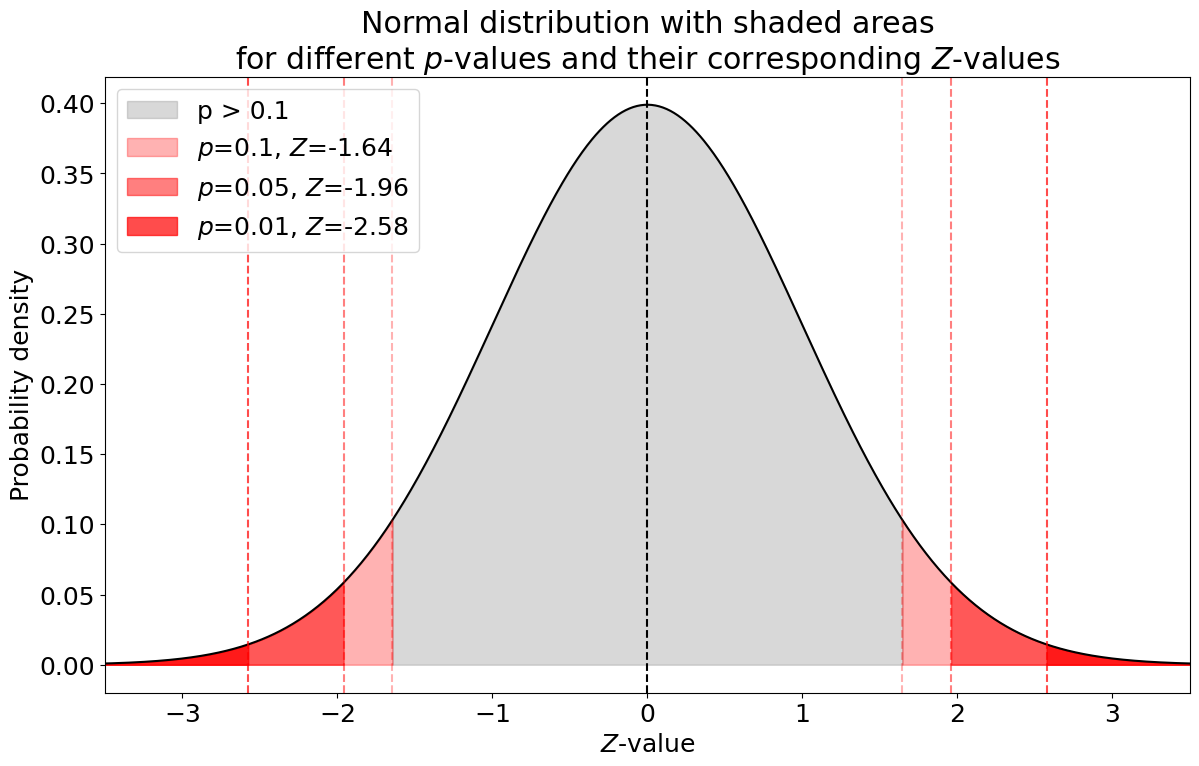

In [14]:
import scipy.stats as stats
import matplotlib

matplotlib.rcParams.update({'font.size': 18})


# Generate data
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)

# Plot the normal distribution
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(x, y, color='black')

# Increase the font size

# Shade the area corresponding to different p-values
p_values = [0.1, 0.05, 0.01]
x_min = -5
x_max = 5

# Add a shaded area for p > 0.1
x_left = stats.norm.ppf(max(p_values)/2)
x_right = stats.norm.ppf(1 -max(p_values)/2)
x_fill = np.linspace(x_left, x_right, 100)
y_fill = stats.norm.pdf(x_fill)
ax.fill_between(x_fill, y_fill, color='gray', alpha=0.3, label="p > 0.1")

# Add a line for the mean
ax.axvline(0, color='black', linestyle='--')

for i, p in enumerate(p_values):
    alpha = 0.3 + 0.2 * i

    x_left = stats.norm.ppf(p/2)
    x_right = stats.norm.ppf(1-p/2)

    x_fill = np.linspace(x_min, x_left, 100)
    y_fill = stats.norm.pdf(x_fill)
    ax.fill_between(x_fill, y_fill, color="red", alpha=alpha, label=f"$p$={p}, $Z$={x_left:.2f}")

    x_fill = np.linspace(x_right, x_max, 100)
    y_fill = stats.norm.pdf(x_fill)
    ax.fill_between(x_fill, y_fill, color="red", alpha=alpha)

    # Also plot the vertical lines on the right for Z-values
    ax.axvline(x_left, color="red", alpha=alpha, linestyle='--')
    ax.axvline(x_right, color="red", alpha=alpha, linestyle='--')


# Add legend for the colors
# legend_labels = [f"p={p}" for p in p_values]
# ax.legend(legend_labels)
# Show legend in the top right corner without background
ax.legend(loc='upper left', frameon=True)

ax.set_xlim(x_min + 1.5, x_max - 1.5)
ax.set_xlabel("$Z$-value")
ax.set_ylabel("Probability density")
ax.set_title('Normal distribution with shaded areas\nfor different $p$-values and their corresponding $Z$-values')
# plt.savefig("thesis/generated/p_values.svg")
plt.show()


In [6]:
# Get the p values for significances 1,2,3,4,5
S = np.arange(1, 6)
p_values = np.zeros_like(S, dtype=np.float64)
for i, s in enumerate(S):
    p_values[i] = 1 - stats.poisson.cdf(s, mu=1)
print(p_values)


[0.26424112 0.0803014  0.01898816 0.00365985 0.00059418]


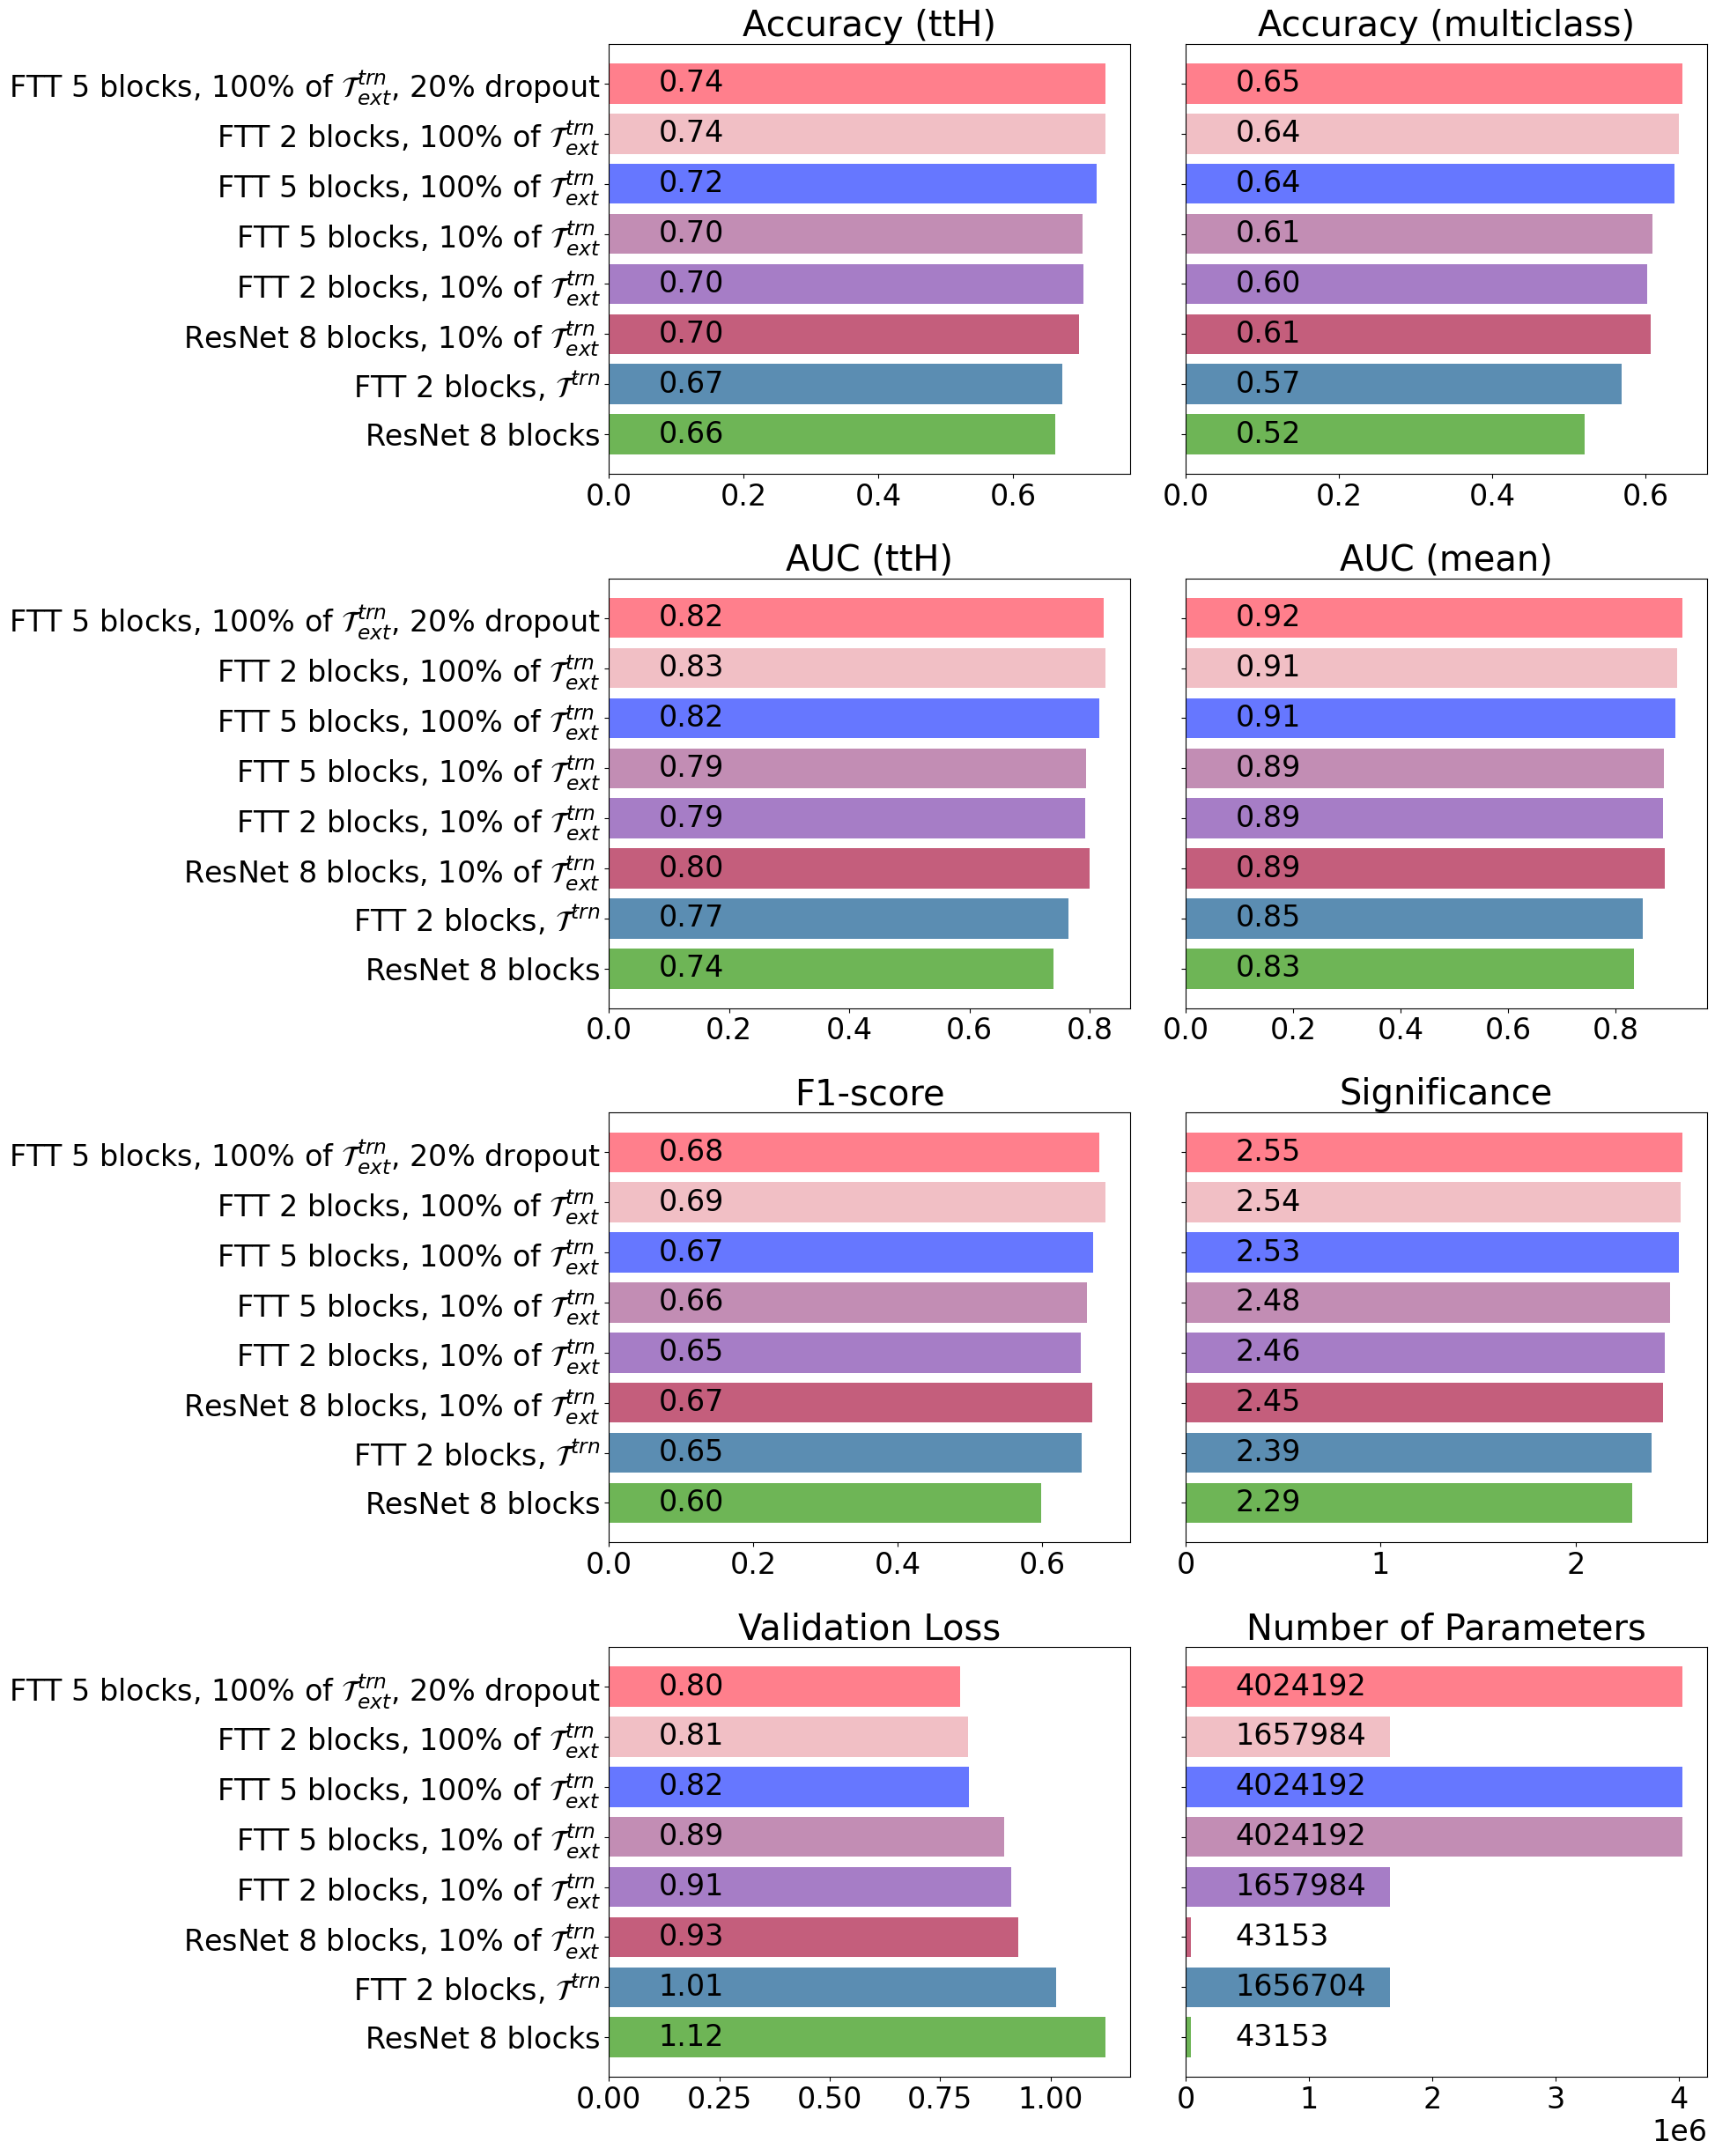

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 24

# Read the csv into a dataframe
df = pd.read_csv('thesis/generated/wandb_results.csv')

t_trn = "$\\mathcal{T}^{trn}$"
t_ext = "$\\mathcal{T}^{trn}_{ext}$"

name_map = {
    "transformer-2": f"FTT 2 blocks, {t_trn}",
    "transformer-2-100-data-5000-batch": f"FTT 2 blocks, 100% of {t_ext}",
    "transformer-5-100-data-5000-batch": f"FTT 5 blocks, 100% of {t_ext}",
    "transformer-5-100-data-5000-batch-20-drop": f"FTT 5 blocks, 100% of {t_ext}, 20% dropout",
    "transformer-5-10-data": f"FTT 5 blocks, 10% of {t_ext}",
    "transformer-2-10-data": f"FTT 2 blocks, 10% of {t_ext}",
    "resnet-8": "ResNet 8 blocks",
    "resnet-8-10-data": f"ResNet 8 blocks, 10% of {t_ext}",
}

df_sorted = df.sort_values(by='val/loss.min', ascending=False)
df_sorted['Name'] = df_sorted['Name'].map(name_map)

metrics = ["val/acc/bin.max", "val/acc/multi.max", "val/auc_w/ttH.max", "val/auc_w/mean.max", "val/f1.max", "sig/significance.max", "val/loss.min", "n_parameters"]
names = ["acc_bin", "acc_multi", "auc_tth", "auc_mean", "f1", "sig", "loss", "n_parameters"]

# Define the table headers
headers = ["Accuracy (ttH)", "Accuracy (multiclass)", "AUC (ttH)", "AUC (mean)", "F1-score", "Significance", "Validation Loss", "Number of Parameters"]

colors = ['#6EB556', '#5B8DB2', '#C45E7C', '#A67DC6', '#C28DB4', '#67f', '#F1BFC5', '#FF7F8C']


fig, axs = plt.subplots((len(metrics) + 1) // 2, 2, figsize=(20, 25), sharey=True)
axs = axs.flatten()
for m, h, name, ax in zip(metrics, headers, names, axs):
    # Define the y-axis label
    ax.set_ylabel("")

    # Define the plot title
    ax.set_title(h)

    # Plot the horizontal bar chart with different colors for each bar
    values = df_sorted[m]
    bars = ax.barh(df_sorted['Name'], values, color=colors, height=0.8)

    # Add exact values on top of the bars
    max_bar_width = max([bar.get_width() for bar in bars])
    for bar in bars:
        width = bar.get_width()
        x = 0.1 * max_bar_width

        text = f'{width:.2f}' if isinstance(width, float) else f'{width}'
        ax.text(x, bar.get_y() + bar.get_height() / 2, text, ha='left', va='center', c='black', fontsize=24)

# Save the figure
fig.tight_layout()
fig.savefig(f"thesis/figures/ml/results/results.pdf", bbox_inches='tight')

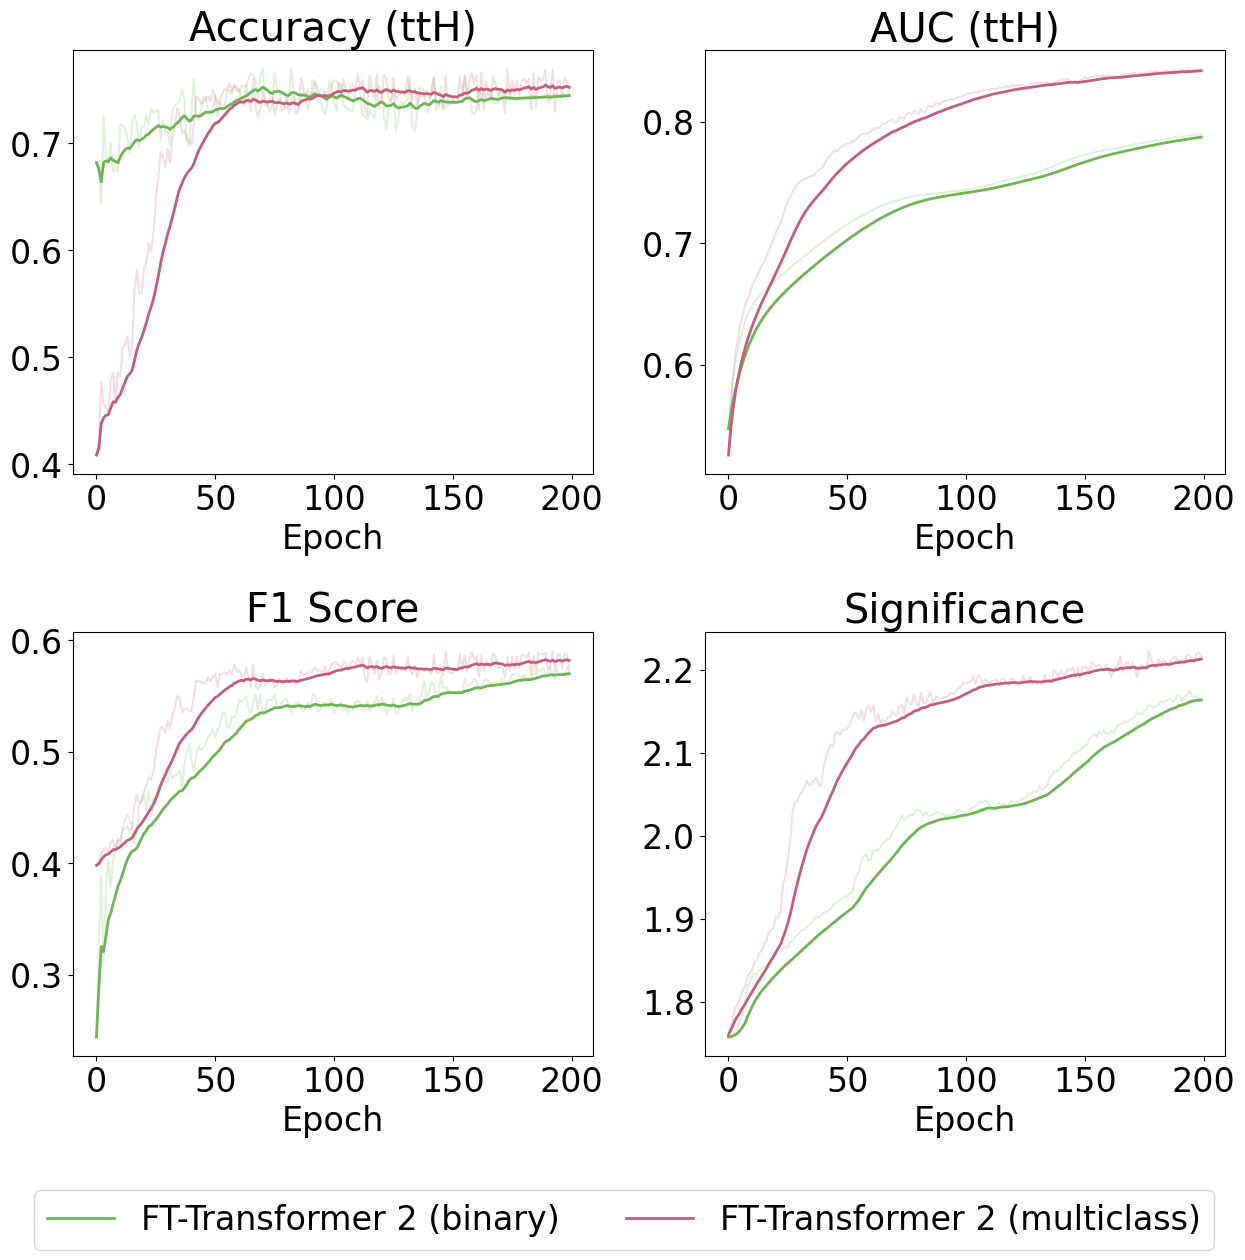

In [17]:
metrics = [
        ("val/acc_bin", "acc", "Accuracy (ttH)"),
        ("val/auc", "auc", "AUC (ttH)"),
        ("val/f1", "f1", "F1 Score"),
        ("sig/significance", "significance", "Significance")
    ]

models = [
    ("transformer-2-(bin)", f"FT-Transformer 2 (binary)"),
    ("transformer-2", f"FT-Transformer 2 (multiclass)")
]

n_epochs = 200
fig, axs = plt.subplots(2, 2, figsize=(13, 12))
axs = axs.flatten()
lines = []
for ax, (metric, filename, title) in zip(axs, metrics):
    df = pd.read_csv(f"thesis/generated/bin/{filename}.csv")

    # Print the columns
    ss = [f"{model} - {metric}" for model, name in models]

    data = [df[s][:n_epochs] for s in ss]

    for d, (model, name), color in zip(data, models, colors[::2]):
        ax.plot(d, alpha=0.2, color=color)

    for d, (model, name), color in zip(data, models, colors[::2]):
        line, = ax.plot(d.ewm(alpha=0.1).mean(), label=name, color=color, linewidth=2)
        if ax == axs[0]:
            lines.append(line)

    # Set the title and labels
    ax.set_title(title)
    ax.set_xlabel("Epoch")

# Set the legend
fig.legend(handles=lines, loc='upper center', bbox_to_anchor=(0.5, 0.0), ncol=2)

fig.tight_layout()
fig.savefig(f"thesis/figures/ml/bin_vs_multi/results.pdf", bbox_inches='tight')


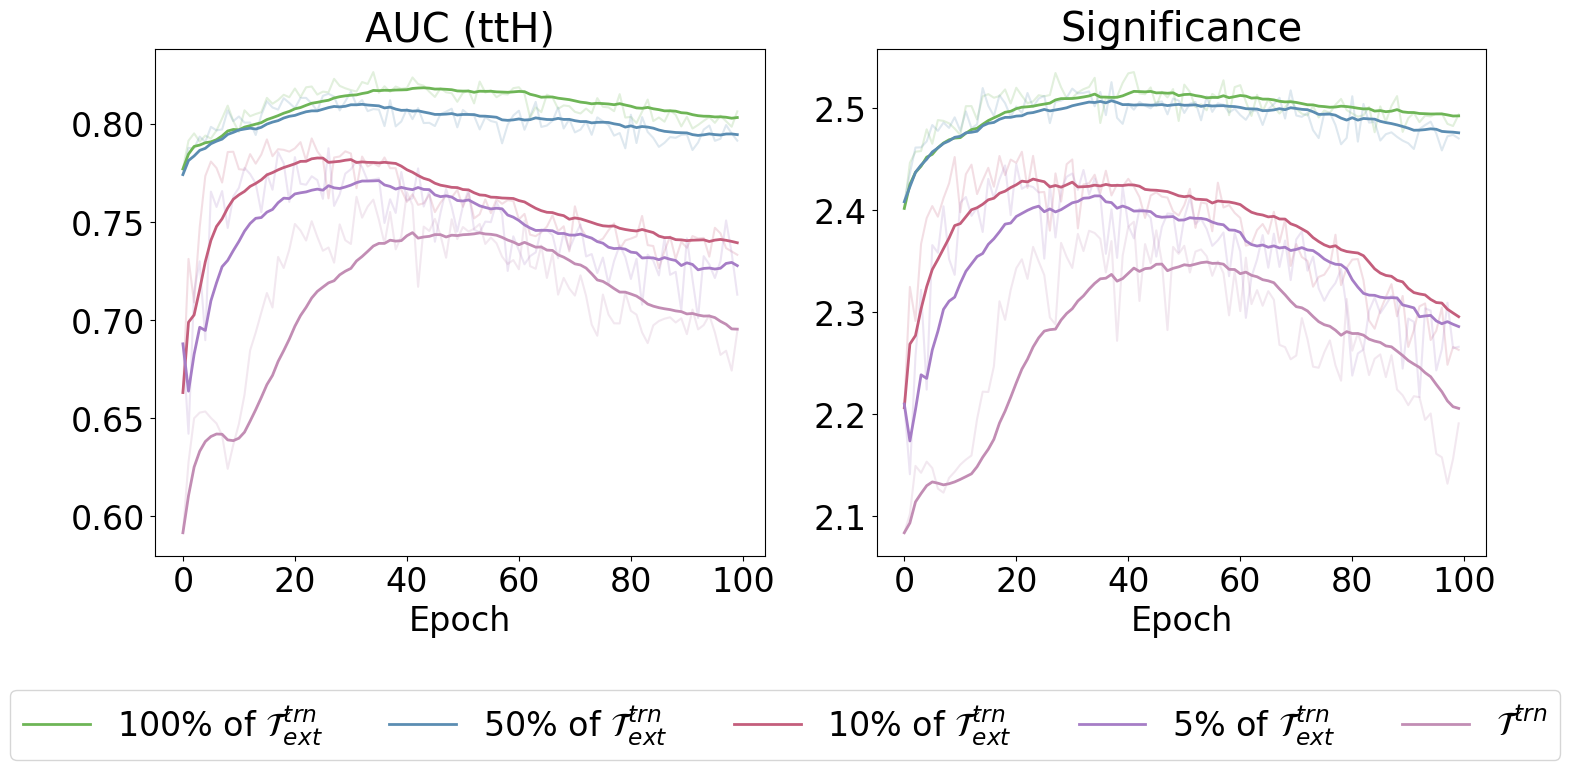

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

metrics = [
        ("val/auc_w/ttH", "auc", "AUC (ttH)"),
        ("sig/significance", "significance", "Significance")
]

models = [
    ("transformer-2-100-data-5000-batch", f"100% of {t_ext}"),
    ("transformer-2-50-data", f"50% of {t_ext}"),
    ("transformer-2-10-data", f"10% of {t_ext}"),
    ("transformer-2-5-data", f"5% of {t_ext}"),
    ("transformer-2", f"{t_trn}"),
]

n_epochs = 100
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs = axs.flatten()
lines = []
for ax, (metric, filename, title) in zip(axs, metrics):
    df = pd.read_csv(f"thesis/generated/fraction/{filename}.csv")

    # Print the columns
    ss = [f"{model} - {metric}" for model, name in models]

    data = [df[s][:n_epochs] for s in ss]

    for d, (model, name), color in zip(data, models, colors):
        ax.plot(d, alpha=0.2, color=color)

    for d, (model, name), color in zip(data, models, colors):
        line, = ax.plot(d.ewm(alpha=0.1).mean(), label=name, color=color, linewidth=2)
        if ax == axs[0]:
            lines.append(line)

    # Set the title and labels
    ax.set_title(title)
    ax.set_xlabel("Epoch")

# Set the legend
fig.legend(handles=lines, loc='upper center', bbox_to_anchor=(0.5, 0.0), ncol=len(models))

fig.tight_layout()
fig.savefig(f"thesis/figures/ml/fraction/results.pdf", bbox_inches='tight')


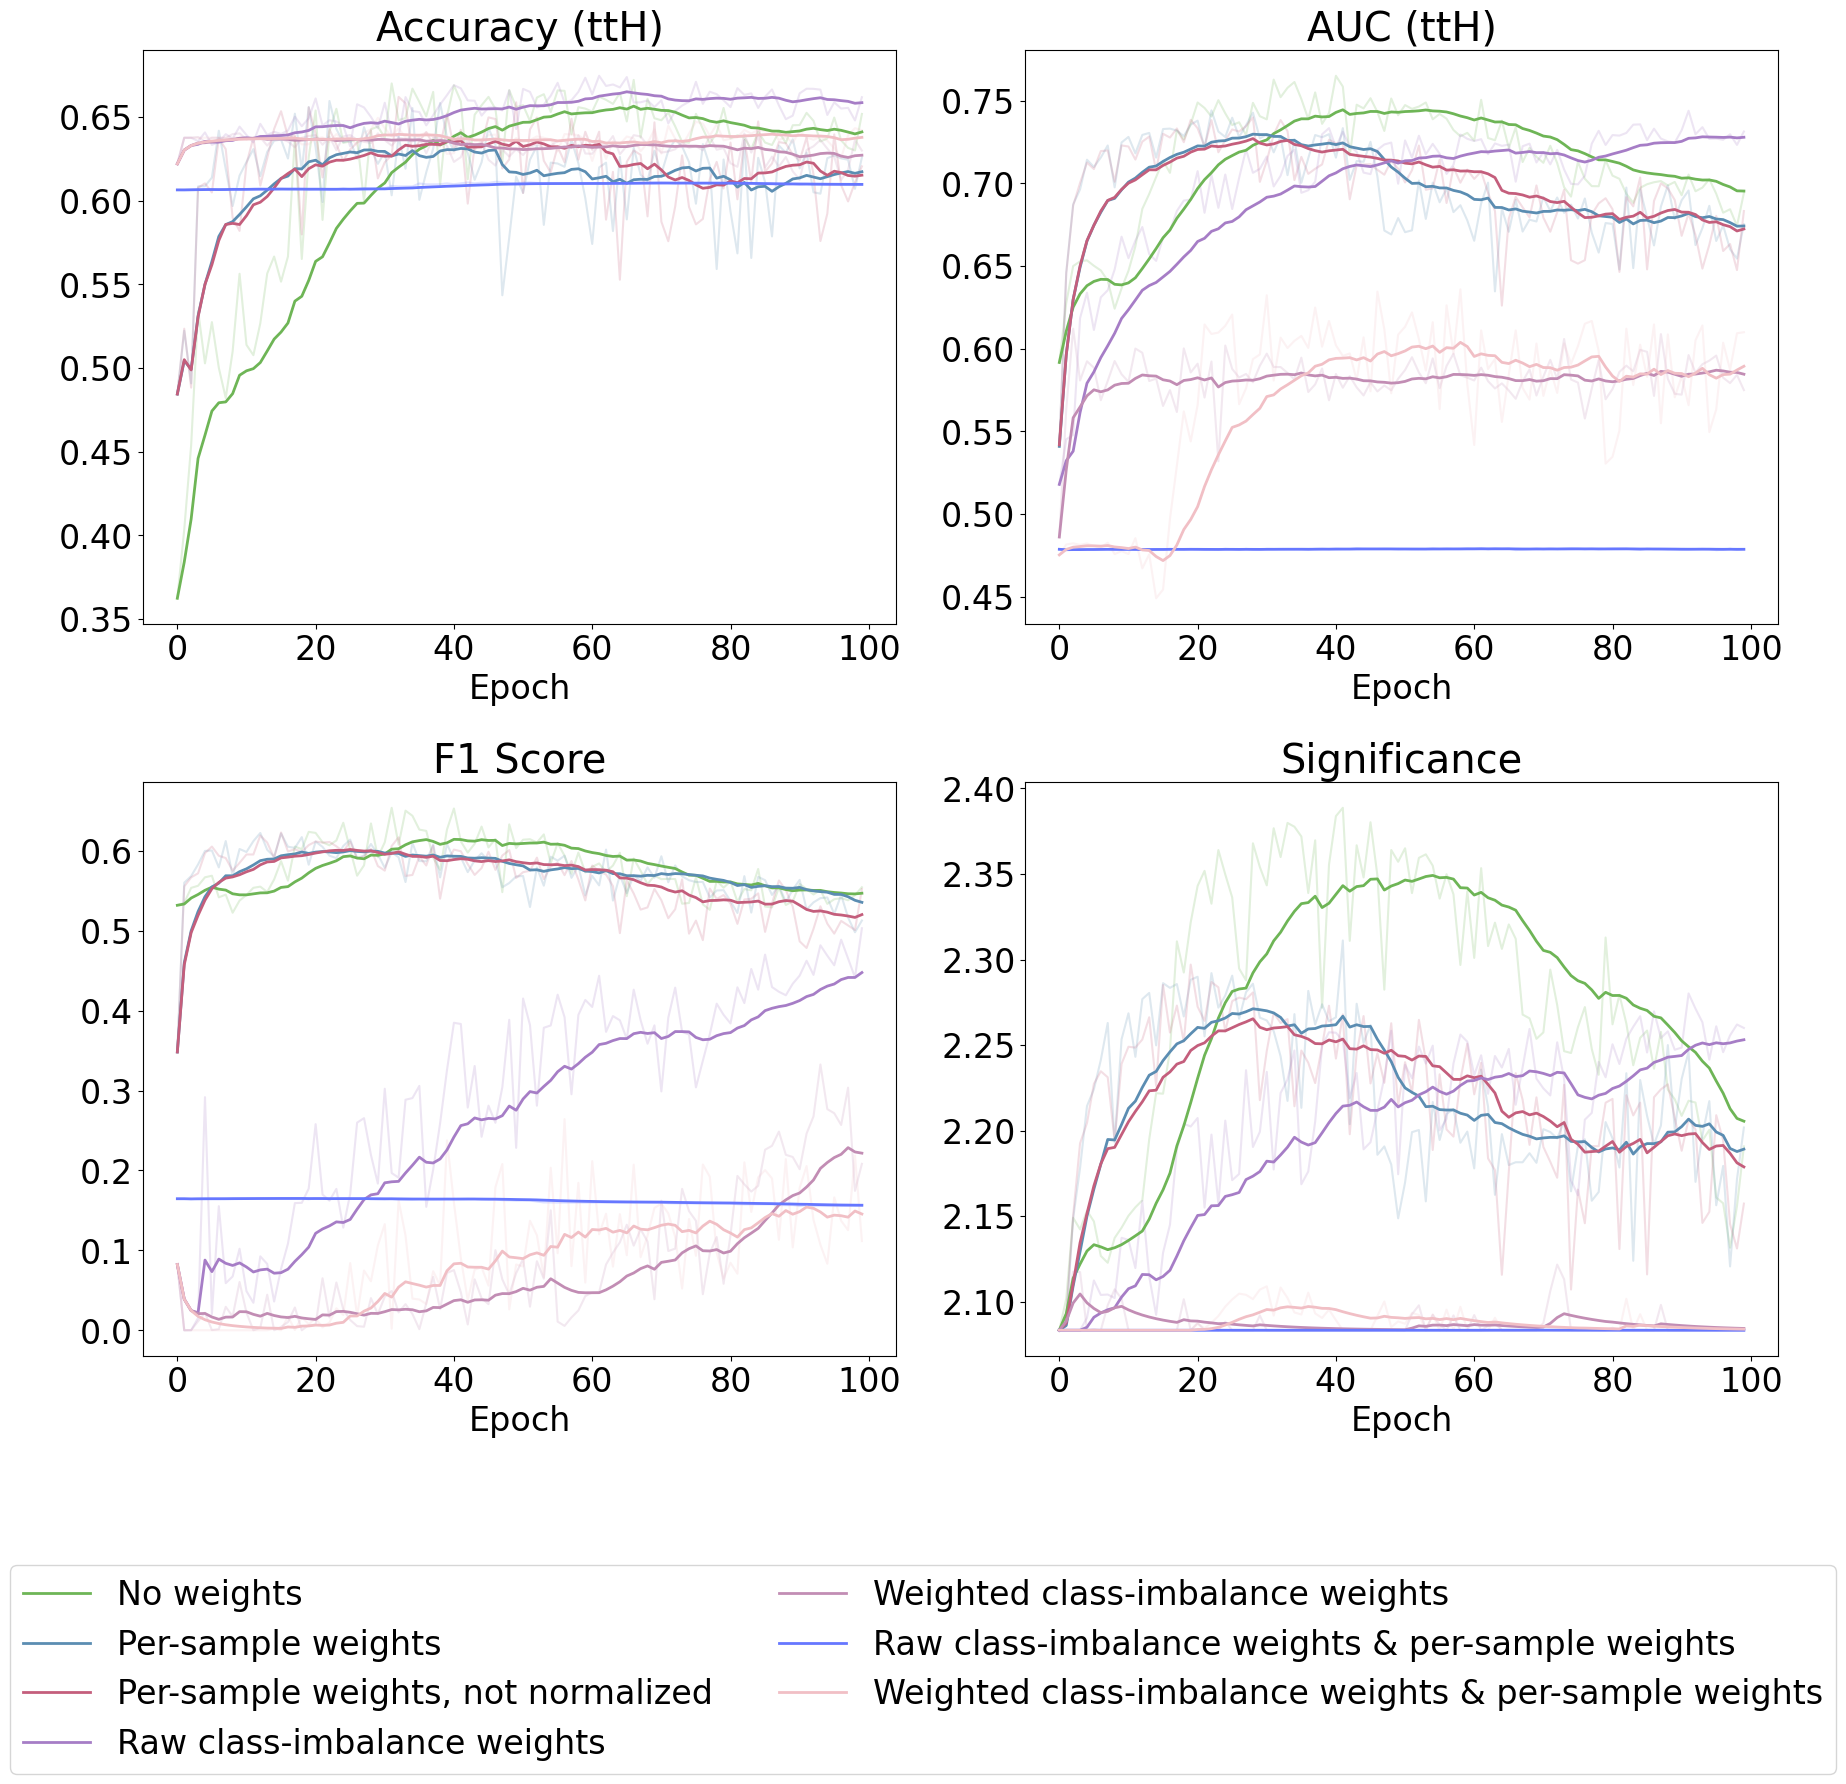

In [19]:
metrics = [
        ("val/acc/bin", "acc", "Accuracy (ttH)"),
        ("val/auc_w/ttH", "auc", "AUC (ttH)"),
        ("val/f1", "f1", "F1 Score"),
        ("sig/significance", "significance", "Significance")
    ]

models = [
    ("transformer-2", "No weights"),
    ("transformer-2-w-sample", "Per-sample weights"),
    ("transformer-2-w-sample-unnorm", "Per-sample weights, not normalized"),
    ("transformer-2-w-class-raw", "Raw class-imbalance weights"),
    ("transformer-2-w-class-weighted", "Weighted class-imbalance weights"),
    ("transformer-2-w-sample-class-raw", "Raw class-imbalance weights & per-sample weights"),
    ("transformer-2-w-sample-class-weighted", "Weighted class-imbalance weights & per-sample weights"),
]

n_epochs = 200
fig, axs = plt.subplots(2, 2, figsize=(18, 15))
axs = axs.flatten()
lines = []
for ax, (metric, filename, title) in zip(axs, metrics):
    df = pd.read_csv(f"thesis/generated/weighting/{filename}.csv")

    # Print the columns
    ss = [f"{model} - {metric}" for model, name in models]

    data = [df[s][:n_epochs] for s in ss]

    for d, (model, name), color in zip(data, models, colors):
        ax.plot(d, alpha=0.2, color=color)

    for d, (model, name), color in zip(data, models, colors):
        line, = ax.plot(d.ewm(alpha=0.1).mean(), label=name, color=color, linewidth=2)
        if ax == axs[0]:
            lines.append(line)

    # Set the title and labels
    ax.set_title(title)
    ax.set_xlabel("Epoch")

# Set the legend
fig.legend(handles=lines, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

# Adjust the subplots to make room for the legend
fig.subplots_adjust(bottom=0.15)

fig.tight_layout()
fig.savefig(f"thesis/figures/ml/weighting/results.pdf", bbox_inches='tight')


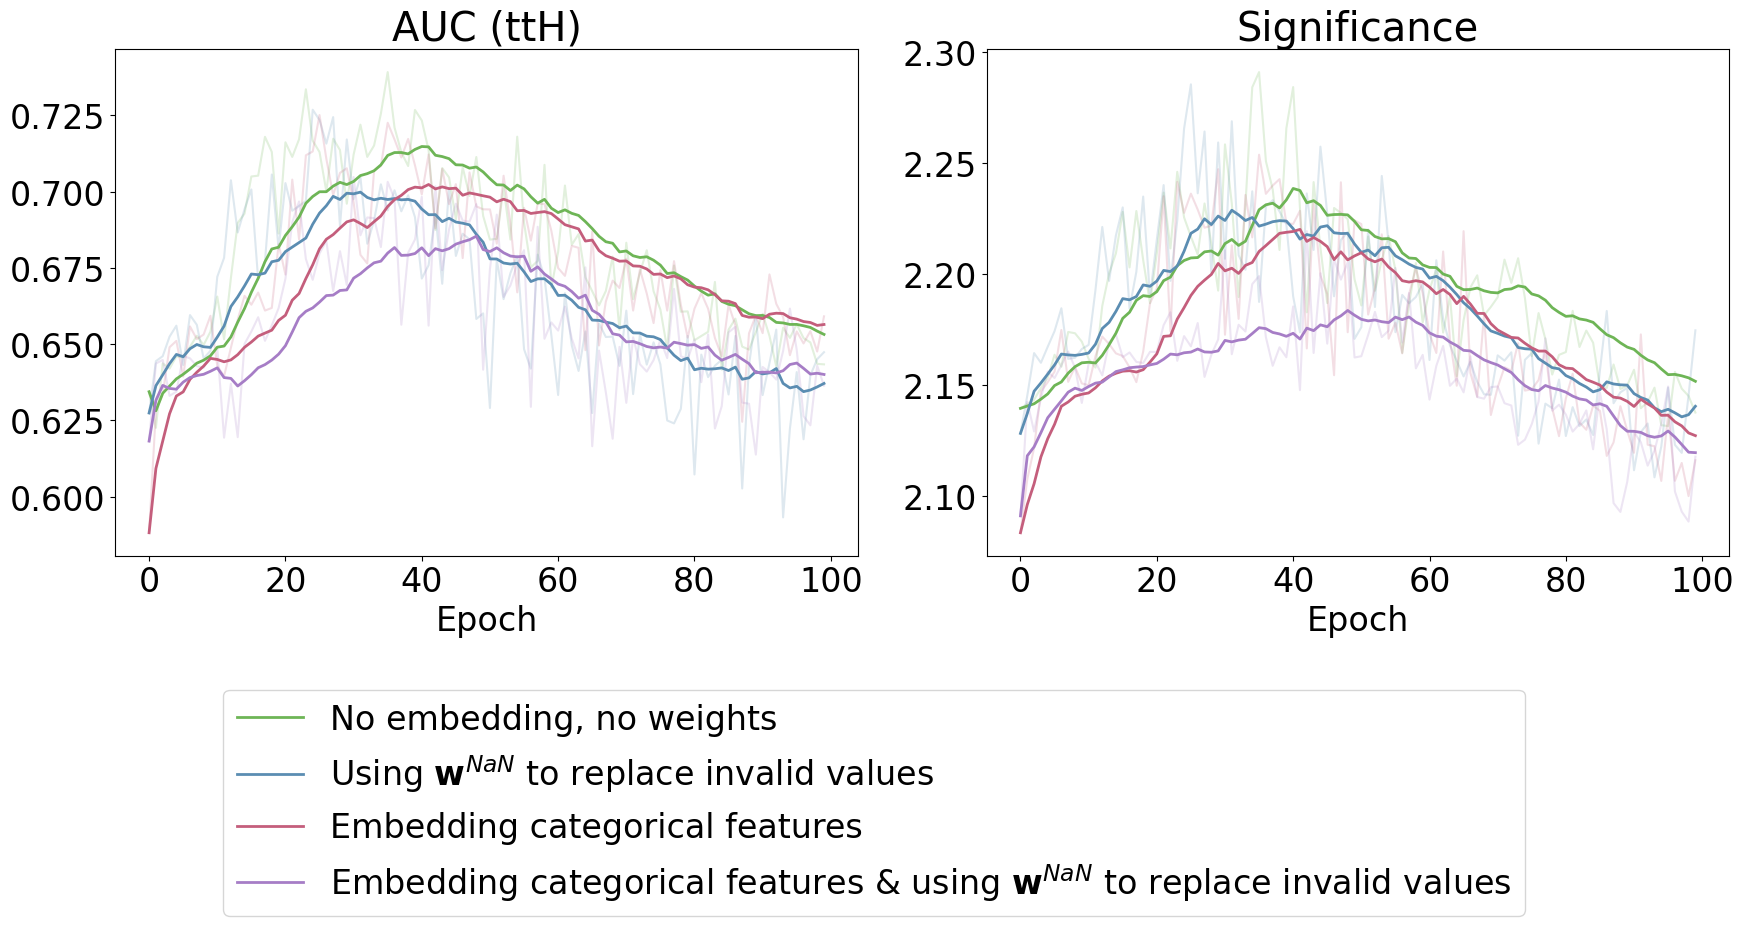

In [20]:
metrics = [
        # ("val/acc/bin", "acc", "Accuracy (ttH)"),
        ("val/auc_w/ttH", "auc", "AUC (ttH)"),
        # ("val/f1", "f1", "F1 Score"),
        ("sig/significance", "significance", "Significance")
    ]

models = [
    # ("transformer-2", "No weights"),
    # ("transformer-2-w-sample", "Per-sample weights"),
    # ("transformer-2-w-sample-unnorm", "Per-sample weights, not normalized"),
    # ("transformer-2-w-class-raw", "Raw class-imbalance weights"),
    # ("transformer-2-w-class-weighted", "Weighted class-imbalance weights"),
    # ("transformer-2-w-sample-class-raw", "Raw class-imbalance weights & per-sample weights"),
    # ("transformer-2-w-sample-class-weighted", "Weighted class-imbalance weights & per-sample weights"),
    ("resnet-8", "No embedding, no weights"),
    ("resnet-8-nan-w", "Using $\mathbf{w}^{NaN}$ to replace invalid values"),
    ("resnet-8-embed", "Embedding categorical features"),
    ("resnet-8-embed-nan-w", "Embedding categorical features & using $\mathbf{w}^{NaN}$ to replace invalid values"),
]

n_epochs = 100
fig, axs = plt.subplots(1, 2, figsize=(18, 7))
axs = axs.flatten()
lines = []
for ax, (metric, filename, title) in zip(axs, metrics):
    df = pd.read_csv(f"thesis/generated/embedding/resnets/{filename}.csv")

    # Print the columns
    ss = [f"{model} - {metric}" for model, name in models]

    data = [df[s][:n_epochs] for s in ss]

    for d, (model, name), color in zip(data, models, colors):
        ax.plot(d, alpha=0.2, color=color)

    for d, (model, name), color in zip(data, models, colors):
        line, = ax.plot(d.ewm(alpha=0.1).mean(), label=name, color=color, linewidth=2)
        if ax == axs[0]:
            lines.append(line)

    # Set the title and labels
    ax.set_title(title)
    ax.set_xlabel("Epoch")

# Set the legend
fig.legend(handles=lines, loc='upper center', bbox_to_anchor=(0.5, 0.0), ncol=1)

# Adjust the subplots to make room for the legend
fig.subplots_adjust(bottom=0.15)

fig.tight_layout()
fig.savefig(f"thesis/figures/ml/embedding/resnets.pdf", bbox_inches='tight')


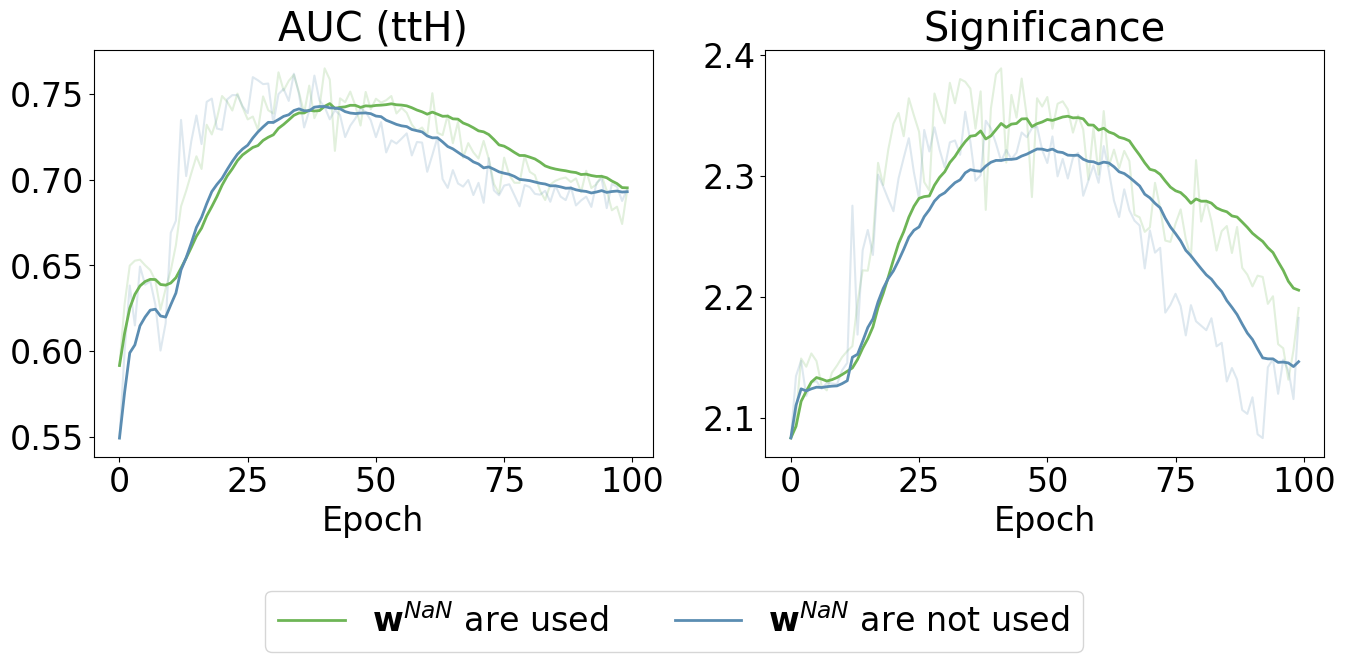

In [12]:
metrics = [
        # ("val/acc/bin", "acc", "Accuracy (ttH)"),
        ("val/auc_w/ttH", "auc", "AUC (ttH)"),
        # ("val/f1", "f1", "F1 Score"),
        ("sig/significance", "significance", "Significance")
    ]

models = [
    # ("transformer-2", "No weights"),
    # ("transformer-2-w-sample", "Per-sample weights"),
    # ("transformer-2-w-sample-unnorm", "Per-sample weights, not normalized"),
    # ("transformer-2-w-class-raw", "Raw class-imbalance weights"),
    # ("transformer-2-w-class-weighted", "Weighted class-imbalance weights"),
    # ("transformer-2-w-sample-class-raw", "Raw class-imbalance weights & per-sample weights"),
    # ("transformer-2-w-sample-class-weighted", "Weighted class-imbalance weights & per-sample weights"),
    ("transformer-2", "$\mathbf{w}^{NaN}$ are used"),
    ("transformer-2-no-w-nan", "$\mathbf{w}^{NaN}$ are not used"),
]

n_epochs = 100
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs = axs.flatten()
lines = []
for ax, (metric, filename, title) in zip(axs, metrics):
    df = pd.read_csv(f"thesis/generated/embedding/transformers/{filename}.csv")

    # Print the columns
    ss = [f"{model} - {metric}" for model, name in models]

    data = [df[s][:n_epochs] for s in ss]

    for d, (model, name), color in zip(data, models, colors):
        ax.plot(d, alpha=0.2, color=color)

    for d, (model, name), color in zip(data, models, colors):
        line, = ax.plot(d.ewm(alpha=0.1).mean(), label=name, color=color, linewidth=2)
        if ax == axs[0]:
            lines.append(line)

    # Set the title and labels
    ax.set_title(title)
    ax.set_xlabel("Epoch")

# Set the legend
fig.legend(handles=lines, loc='upper center', bbox_to_anchor=(0.5, 0.0), ncol=2)

# Adjust the subplots to make room for the legend
fig.subplots_adjust(bottom=0.15)

fig.tight_layout()
fig.savefig(f"thesis/figures/ml/embedding/transformers.pdf", bbox_inches='tight')


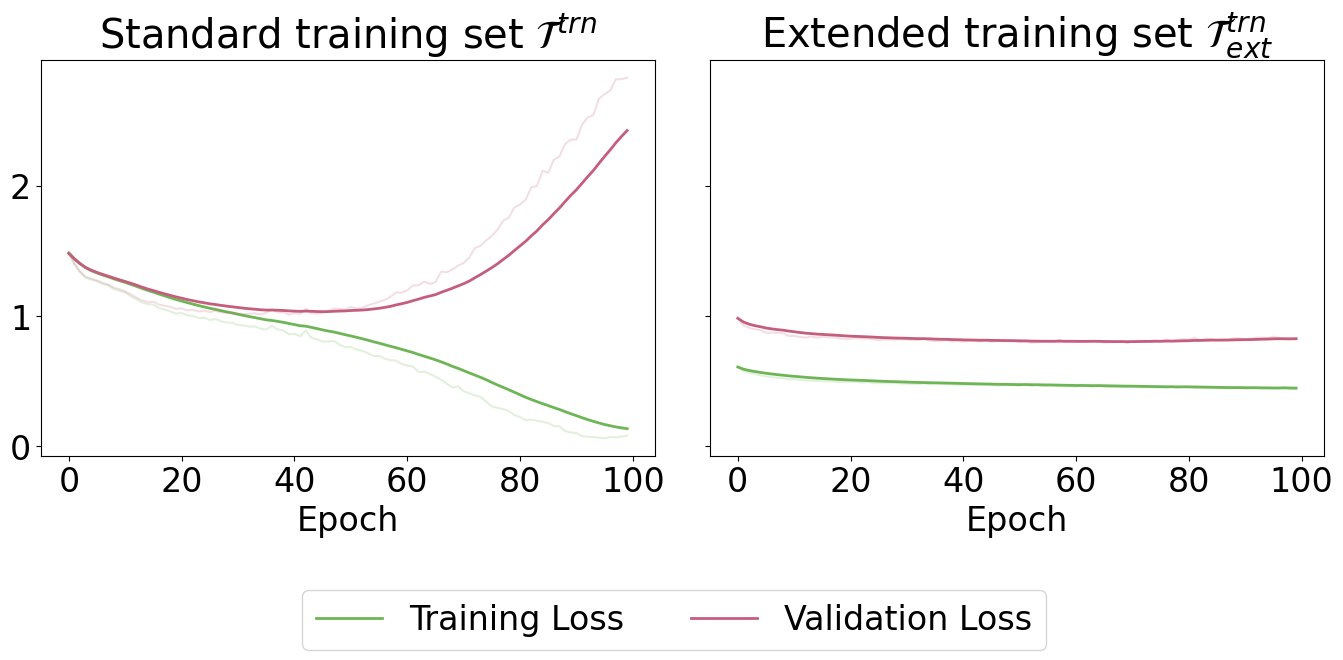

In [13]:
metrics = [
        # ("val/acc/bin", "acc", "Accuracy (ttH)"),
        # ("val/auc_w/ttH", "auc", "AUC (ttH)"),
        # ("val/f1", "f1", "F1 Score"),
        # ("sig/significance", "significance", "Significance")
        ("trn/loss", "Training Loss"),
        ("val/loss", "Validation Loss"),
    ]

models = [
    # ("transformer-2", "No weights"),
    # ("transformer-2-w-sample", "Per-sample weights"),
    # ("transformer-2-w-sample-unnorm", "Per-sample weights, not normalized"),
    # ("transformer-2-w-class-raw", "Raw class-imbalance weights"),
    # ("transformer-2-w-class-weighted", "Weighted class-imbalance weights"),
    # ("transformer-2-w-sample-class-raw", "Raw class-imbalance weights & per-sample weights"),
    # ("transformer-2-w-sample-class-weighted", "Weighted class-imbalance weights & per-sample weights"),
    ("transformer-2", "2", f"Standard training set {t_trn}"),
    ("transformer-5-100-data-5000-batch-20-drop", "5", f"Extended training set {t_ext}"),
]

n_epochs = 100
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
axs = axs.flatten()
lines = []
for ax, (model, filename, name) in zip(axs, models):
    df = pd.read_csv(f"thesis/generated/losses/{filename}.csv")

    for (metric, title), color in zip(metrics, colors[::2]):
        # Print the columns
        data = df[f"{model} - {metric}"][:n_epochs]

        ax.plot(data, alpha=0.2, color=color)
        line, = ax.plot(data.ewm(alpha=0.1).mean(), label=title, color=color, linewidth=2)
        if ax == axs[0]:
            lines.append(line)

        # Set the title and labels
    ax.set_title(name)
    ax.set_xlabel("Epoch")

    # Set the legend
fig.legend(handles=lines, loc='upper center', bbox_to_anchor=(0.5, 0.0), ncol=2)
    # ax.legend()

    # Adjust the subplots to make room for the legend
    # fig.subplots_adjust(bottom=0.15)

fig.tight_layout()
fig.savefig(f"thesis/figures/ml/training/losses.pdf", bbox_inches='tight')
